In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
bike = pd.read_csv('data/mobike.csv',index_col=0)

In [2]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6427 entries, 439283 to 278179
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   user_id            6427 non-null   int64  
 1   start_time         6427 non-null   object 
 2   end_time           6427 non-null   object 
 3   timeduration       6427 non-null   int64  
 4   bikeid             6427 non-null   int64  
 5   tripduration       6427 non-null   object 
 6   from_station_id    6427 non-null   int64  
 7   from_station_name  6427 non-null   object 
 8   to_station_id      6427 non-null   int64  
 9   to_station_name    6427 non-null   object 
 10  usertype           6427 non-null   object 
 11  gender             5938 non-null   object 
 12  birthyear          5956 non-null   float64
 13  age                6427 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 753.2+ KB


In [3]:
# 从info 的结果中返现, 性别和生日有缺失值

In [4]:
bike.describe()

,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear
count,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,5956.000000
mean,2.135519e+07,11.778902,3491.637934,195.038432,198.502567,1982.488583
std,2.181294e+05,9.692236,1912.171846,148.170025,148.939873,11.147859
min,2.098358e+07,0.000000,2.000000,2.000000,2.000000,1906.000000
25%,2.116805e+07,5.000000,1852.000000,77.000000,80.000000,1977.000000
50%,2.135114e+07,9.000000,3618.000000,168.000000,172.000000,1986.000000
75%,2.154376e+07,15.000000,5179.500000,287.000000,287.000000,1991.000000
max,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2002.000000


In [5]:
bike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,"1,090",163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [6]:
sum(bike.duplicated())

0

In [7]:
bike.usertype.unique() # Subscriber 注册用户 Customer 临时用户

array(['Subscriber', 'Customer'], dtype=object)

In [8]:
bike.usertype.value_counts()

Subscriber    5753
Customer       674
Name: usertype, dtype: int64

## 数据探索与数据处理

In [9]:
bike.gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [10]:
bike['gender'] = bike['gender'].fillna('Unknown') # 用未知来填充缺失值

In [11]:
bike.drop('bikeid',axis = 1,inplace=True) # 去掉车辆编号

In [12]:
bike.query('age==" "')

,user_id,start_time,end_time,timeduration,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
371796,21417733,11/3/2018 16:32,11/3/2018 16:54,22,"1,347",31,Franklin St & Chicago Ave,315,Elston Ave & Wabansia Ave,Customer,Unknown,NaN,
80060,21076161,10/7/2018 7:31,10/7/2018 12:02,31,"16,274",196,Cityfront Plaza Dr & Pioneer Ct,45,Michigan Ave & Congress Pkwy,Customer,Unknown,NaN,
92242,21090205,10/8/2018 12:10,10/8/2018 12:18,7,453,341,Adler Planetarium,3,Shedd Aquarium,Customer,Unknown,NaN,
331956,21371191,10/30/2018 18:42,10/30/2018 18:59,17,"1,056",128,Damen Ave & Chicago Ave,342,Wolcott Ave & Polk St,Customer,Unknown,NaN,
208326,21225619,10/18/2018 10:52,10/18/2018 11:17,24,"1,465",97,Field Museum,35,Streeter Dr & Grand Ave,Customer,Unknown,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306859,21341969,10/28/2018 12:24,10/28/2018 12:45,20,"1,255",284,Michigan Ave & Jackson Blvd,97,Field Museum,Customer,Unknown,NaN,
431362,21489456,11/12/2018 19:10,11/12/2018 19:55,44,"2,668",145,Mies van der Rohe Way & Chestnut St,97,Field Museum,Customer,Unknown,NaN,
60956,21054004,10/4/2018 22:56,10/4/2018 23:53,57,"3,426",97,Field Museum,158,Milwaukee Ave & Wabansia Ave,Customer,Unknown,NaN,
484317,21553590,11/22/2018 15:38,11/22/2018 15:59,20,"1,246",76,Lake Shore Dr & Monroe St,35,Streeter Dr & Grand Ave,Customer,Unknown,NaN,


In [13]:
bike = bike.drop('birthyear',axis = 1)

In [14]:
# 处理日期时间类型的数据
bike['start_time'] = pd.to_datetime((bike['start_time']))
bike['end_time'] = pd.to_datetime((bike['end_time']))

<AxesSubplot:>

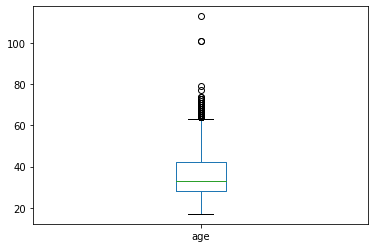

In [15]:
bike.query('age!=" "')['age'].astype(int).plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

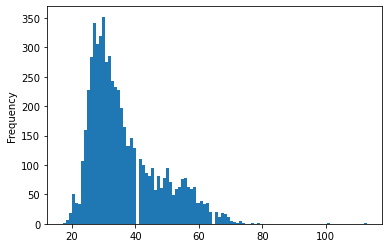

In [16]:
bike.query('age!=" "')['age'].astype(int).plot(kind = 'hist',bins=100)

In [17]:
bike['weekday'] = bike['start_time'].dt.weekday # 星期
bike['hour'] = bike['start_time'].dt.hour # 小时

In [18]:
bike['tripduration'] = bike['tripduration'].str.replace(',','').astype(int)

<AxesSubplot:>

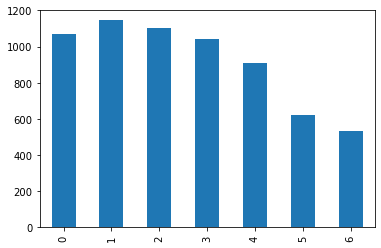

In [19]:
bike['weekday'].value_counts().sort_index().plot(kind  ='bar')

<AxesSubplot:>

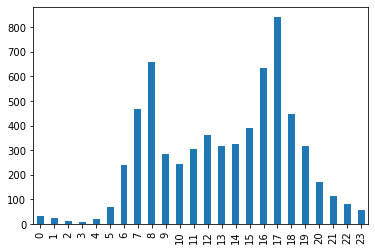

In [20]:
bike['hour'].value_counts().sort_index().plot(kind  ='bar')

In [21]:
#  用车的时间高峰 周间 早晚高峰 通勤时段

<AxesSubplot:xlabel='gender', ylabel='timeduration'>

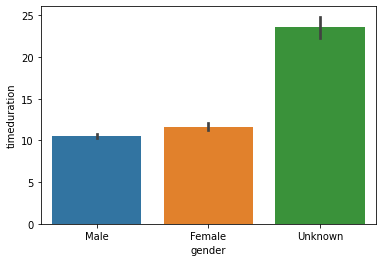

In [22]:
sns.barplot(x= 'gender',y='timeduration',data = bike)

<AxesSubplot:xlabel='gender', ylabel='tripduration'>

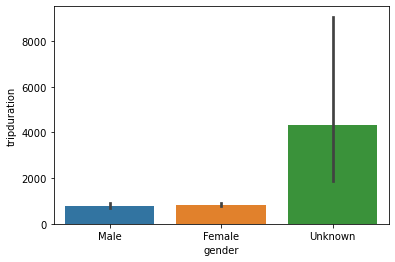

In [23]:
sns.barplot(x= 'gender',y='tripduration',data = bike)

In [24]:
# 骑行距离明显有异常的情况

In [25]:
bike.tripduration.min()

61

In [26]:
bike.timeduration.max()

59

In [27]:
bike.tripduration.quantile(0.97)  # 97%分位数 2765

2765.1000000000013

In [28]:
bike_clean = bike[bike.tripduration<3000]
bike_clean = bike_clean.query('age!=" "')

In [29]:
bike_clean = bike_clean.drop(['from_station_name','to_station_name','start_time','end_time','user_id'],axis = 1)

In [30]:
bike_clean.age = bike_clean.age.astype(int)

In [31]:
bike_clean = bike_clean[bike_clean['age']<80]

## Kmeans 聚类

In [33]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5876 entries, 439283 to 278179
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   timeduration     5876 non-null   int64 
 1   tripduration     5876 non-null   int64 
 2   from_station_id  5876 non-null   int64 
 3   to_station_id    5876 non-null   int64 
 4   usertype         5876 non-null   object
 5   gender           5876 non-null   object
 6   age              5876 non-null   int64 
 7   weekday          5876 non-null   int64 
 8   hour             5876 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 459.1+ KB


In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [37]:
df2 = bike_clean.copy()
df2= df2.drop(['from_station_id','to_station_id','timeduration','hour'],axis =1)
df2['weekday'] = df2['weekday'].apply(lambda x:'周间' if x<5 else '周末') # 把星期几的数据换成周间/周末

In [39]:
df2 = pd.get_dummies(df2)

In [40]:
# 聚类之前, 一定要注意标准化/归一化的问题

,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,gender_Unknown,weekday_周末,weekday_周间
439283,436,37,0,1,0,1,0,0,1
603317,445,31,0,1,0,1,0,0,1
109957,1090,30,1,0,0,1,0,0,1
428082,581,30,0,1,1,0,0,0,1
395437,390,40,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
186995,431,36,0,1,1,0,0,0,1
260464,918,29,0,1,0,1,0,0,1
182777,1165,33,0,1,1,0,0,0,1
606080,500,35,0,1,0,1,0,0,1


In [44]:
scaler = MinMaxScaler()
num_feature = ['tripduration','age']
df2[num_feature] = scaler.fit_transform(df2[num_feature])

In [45]:
df2

,tripduration,age,usertype_Customer,usertype_Subscriber,gender_Female,gender_Male,gender_Unknown,weekday_周末,weekday_周间
439283,0.128777,0.322581,0,1,0,1,0,0,1
603317,0.131868,0.225806,0,1,0,1,0,0,1
109957,0.353365,0.209677,1,0,0,1,0,0,1
428082,0.178571,0.209677,0,1,1,0,0,0,1
395437,0.112981,0.370968,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
186995,0.127060,0.306452,0,1,1,0,0,0,1
260464,0.294299,0.193548,0,1,0,1,0,0,1
182777,0.379121,0.258065,0,1,1,0,0,0,1
606080,0.150755,0.290323,0,1,0,1,0,0,1


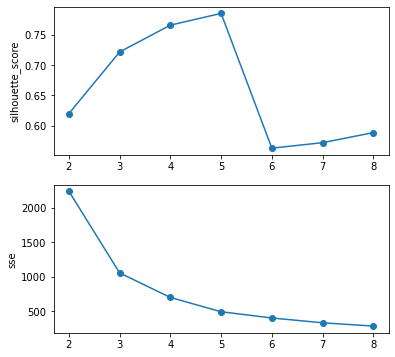

In [47]:
sc_score = []
sse = []
for k in range(2,9):
    estimator = KMeans(n_clusters=k,random_state=10)
    estimator.fit(df2)
    sc_score.append(silhouette_score(df2,estimator.labels_))
    sse.append(estimator.inertia_)

plt.figure(figsize=(6,6))
plt.subplot(211)
x = range(2,9)
plt.ylabel('silhouette_score')
plt.plot(x,sc_score,'o-')

plt.subplot(212)
x = range(2,9)
plt.ylabel('sse')
plt.plot(x,sse,'o-')
plt.show()

In [48]:
estimator = KMeans(n_clusters=5,random_state=10)
bike_clean['label'] = estimator.fit_predict(df2)

In [ ]:
## 结果解读

In [49]:
bike_clean.groupby('label').gender.describe()  # 0和 3群都是男性  1群2群 绝大多数都是女性

,count,unique,top,freq
label,,,,
0,3823,1,Male,3823
1,1023,2,Female,1010
2,246,2,Female,244
3,631,1,Male,631
4,153,3,Male,131


In [50]:
bike_clean.groupby('label').usertype.describe()  # 4群是非注册用户

,count,unique,top,freq
label,,,,
0,3823,1,Subscriber,3823
1,1023,1,Subscriber,1023
2,246,2,Subscriber,226
3,631,1,Subscriber,631
4,153,1,Customer,153


<AxesSubplot:>

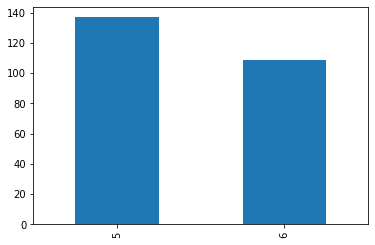

In [59]:
bike_clean[bike_clean['label']==2].weekday.value_counts().plot(kind = 'bar')

In [64]:
bike_clean.groupby('label').age.describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
0,3823.0,37.257651,11.178575,17.0,29.0,34.0,44.0,74.0
1,1023.0,35.201369,10.392706,18.0,28.0,32.0,39.5,71.0
2,246.0,33.686992,9.867882,19.0,27.0,31.0,36.0,72.0
3,631.0,35.575277,11.188867,17.0,27.0,32.0,40.0,79.0
4,153.0,33.163399,10.355178,18.0,25.0,30.0,39.0,60.0
